In [7]:
import numpy as np
import yt
import glob
%matplotlib notebook
from yt.funcs import mylog
import matplotlib.pyplot as plt



units_override = {"length_unit": (1.0, 'cm'), 
                 "time_unit": (1.0,"s"), 
                 "mass_unit": (1.0,"g")}

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)


# Load in an HDF5 File using yt library

In [8]:
ds = yt.load("../RUN6-b2xres/kh-slip.out2.00300.athdf")  #yt.load takes path to hdf5 output file as argument

yt : [WARNING  ] 2021-08-13 15:00:34,901 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 15:00:34,902 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 15:00:34,903 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 15:00:34,904 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 15:00:34,912 Parameters: current_time              = 3.0000806
yt : [INFO     ] 2021-08-13 15:00:34,913 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 15:00:34,913 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 15:00:34,914 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 15:00:34,914 Parameters: cosmological_simulation   = 0.0


### We can showcase what fields we have available at our disposal

In [9]:
ds.field_list #variables native to Athena++

[('athena_pp', 'Bcc1'),
 ('athena_pp', 'Bcc2'),
 ('athena_pp', 'Bcc3'),
 ('athena_pp', 'press'),
 ('athena_pp', 'rho'),
 ('athena_pp', 'vel1'),
 ('athena_pp', 'vel2'),
 ('athena_pp', 'vel3')]

In [10]:
ds.derived_field_list #variables derived by yt from native Athena++ variables

[('athena_pp', 'Bcc1'),
 ('athena_pp', 'Bcc2'),
 ('athena_pp', 'Bcc3'),
 ('athena_pp', 'cell_volume'),
 ('athena_pp', 'dx'),
 ('athena_pp', 'dy'),
 ('athena_pp', 'dz'),
 ('athena_pp', 'path_element_x'),
 ('athena_pp', 'path_element_y'),
 ('athena_pp', 'path_element_z'),
 ('athena_pp', 'press'),
 ('athena_pp', 'rho'),
 ('athena_pp', 'vel1'),
 ('athena_pp', 'vel2'),
 ('athena_pp', 'vel3'),
 ('athena_pp', 'vertex_x'),
 ('athena_pp', 'vertex_y'),
 ('athena_pp', 'vertex_z'),
 ('athena_pp', 'x'),
 ('athena_pp', 'y'),
 ('athena_pp', 'z'),
 ('gas', 'H_nuclei_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'alfven_speed'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 

# Visualize an HDF5 data file using yt

yt : [INFO     ] 2021-08-13 15:00:35,183 xlim = -1.000000 1.000000
yt : [INFO     ] 2021-08-13 15:00:35,184 ylim = -0.500000 0.500000
yt : [INFO     ] 2021-08-13 15:00:35,185 xlim = -1.000000 1.000000
yt : [INFO     ] 2021-08-13 15:00:35,185 ylim = -0.500000 0.500000
yt : [INFO     ] 2021-08-13 15:00:35,186 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800



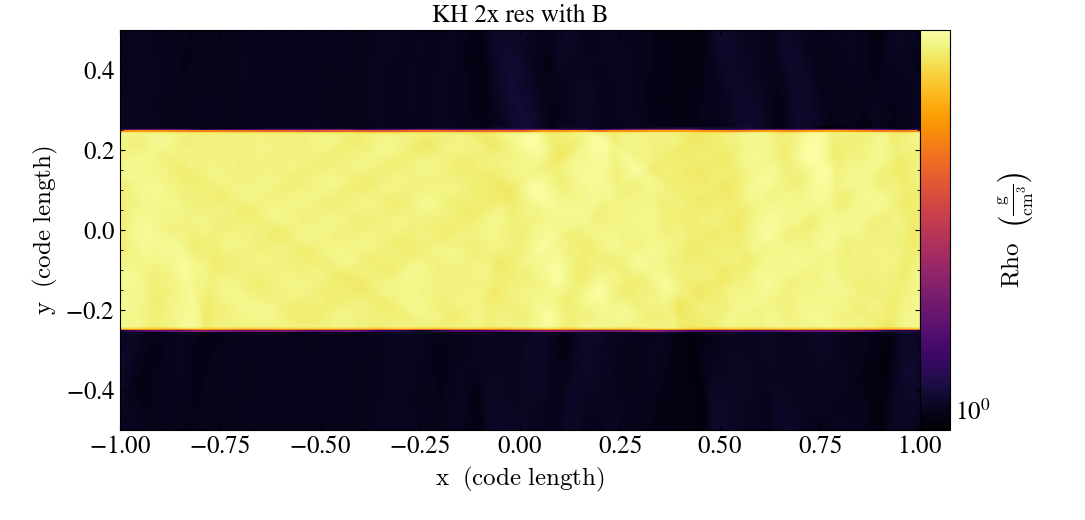

In [11]:
#yt.plot_2d takes data set argument and data set field argument
plot = yt.plot_2d(ds, "rho")
plot.annotate_title("KH 2x res with B")
plot.set_cmap('rho', "inferno")
plot.set_unit('rho', 'g/cm**3')
plot.set_axes_unit('cm')
plot.show()

# Create Movies from all data files!

In [6]:
import yt
from matplotlib.animation import FuncAnimation
from matplotlib import rc_context

ts = yt.load('../RUN6-b2xres/kh-slip.out2.*.athdf')

plot = yt.plot_2d(ds, "rho")
# plot.set_title("Kelvin-Helmholtz Instability")
# plot.set_cmap('rho', "inferno")
# plot.set_unit('rho', 'g/cm**3')
# plot.set_axes_unit('cm')

fig = plot.plots['rho'].figure

# animate must accept an integer frame number. We use the frame number
# to identify which dataset in the time series we want to load
def animate(i):
    ds = ts[i]
    plot._switch_ds(ds)

animation = FuncAnimation(fig, animate, frames=len(ts), interval=50)

# Dont forget to change this to what you want
animation_name = 'RUN6-b2xres'

# Override matplotlib's defaults to get a nicer looking font
with rc_context({'mathtext.fontset': 'stix'}):
    animation.save(animation_name + '.mp4')

yt : [INFO     ] 2021-08-13 14:54:44,636 xlim = -1.000000 1.000000
yt : [INFO     ] 2021-08-13 14:54:44,637 ylim = -0.500000 0.500000
yt : [INFO     ] 2021-08-13 14:54:44,637 xlim = -1.000000 1.000000
yt : [INFO     ] 2021-08-13 14:54:44,638 ylim = -0.500000 0.500000
yt : [INFO     ] 2021-08-13 14:54:44,639 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:54:45,991 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:54:45,992 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:54:45,993 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:54:45,993 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:54:46,007 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-08-13 14:54:46,008 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:54:46,009 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:54:46,009 Parameters: domain_right_edge         = [1.  0.5 0.5]

yt : [INFO     ] 2021-08-13 14:54:53,938 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:54:53,939 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:54:53,939 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:54:53,941 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:54:54,694 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:54:54,695 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:54:54,695 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:54:54,696 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:54:54,706 Parameters: current_time              = 0.09034951
yt : [INFO     ] 2021-08-13 14:54:54,706 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:54:54,707 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:54:54,707 Parameters: domain_right_edge       

yt : [INFO     ] 2021-08-13 14:55:03,348 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:03,349 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:55:03,349 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:55:03,354 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:55:04,107 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:55:04,108 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:55:04,109 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:55:04,110 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:55:04,118 Parameters: current_time              = 0.19022256
yt : [INFO     ] 2021-08-13 14:55:04,119 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:55:04,119 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:04,120 Parameters: domain_right_edge       

yt : [INFO     ] 2021-08-13 14:55:11,897 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:11,897 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:55:11,898 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:55:11,900 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:55:12,693 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:55:12,694 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:55:12,694 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:55:12,695 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:55:12,705 Parameters: current_time              = 0.29009637
yt : [INFO     ] 2021-08-13 14:55:12,706 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:55:12,706 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:12,707 Parameters: domain_right_edge       

yt : [INFO     ] 2021-08-13 14:55:19,768 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:19,769 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:55:19,769 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:55:19,772 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:55:20,647 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:55:20,648 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:55:20,649 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:55:20,650 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:55:20,660 Parameters: current_time              = 0.39040697
yt : [INFO     ] 2021-08-13 14:55:20,661 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:55:20,661 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:20,662 Parameters: domain_right_edge       

yt : [INFO     ] 2021-08-13 14:55:27,817 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:27,818 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:55:27,819 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:55:27,821 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:55:28,602 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:55:28,603 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:55:28,603 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:55:28,604 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:55:28,615 Parameters: current_time              = 0.49026063
yt : [INFO     ] 2021-08-13 14:55:28,615 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:55:28,618 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:28,619 Parameters: domain_right_edge       

yt : [INFO     ] 2021-08-13 14:55:36,039 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:36,039 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:55:36,040 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:55:36,042 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:55:36,777 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:55:36,781 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:55:36,782 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:55:36,782 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:55:36,791 Parameters: current_time              = 0.59013486
yt : [INFO     ] 2021-08-13 14:55:36,792 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:55:36,792 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:36,793 Parameters: domain_right_edge       

yt : [INFO     ] 2021-08-13 14:55:44,176 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:44,177 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:55:44,177 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:55:44,181 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:55:45,172 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:55:45,173 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:55:45,174 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:55:45,174 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:55:45,185 Parameters: current_time              = 0.69042087
yt : [INFO     ] 2021-08-13 14:55:45,185 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:55:45,186 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:45,186 Parameters: domain_right_edge       

yt : [INFO     ] 2021-08-13 14:55:52,809 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:52,810 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:55:52,810 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:55:52,812 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:55:53,711 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:55:53,713 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:55:53,714 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:55:53,715 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:55:53,727 Parameters: current_time              = 0.79027843
yt : [INFO     ] 2021-08-13 14:55:53,728 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:55:53,729 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:55:53,730 Parameters: domain_right_edge       

yt : [INFO     ] 2021-08-13 14:56:01,081 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:01,084 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:56:01,085 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:56:01,088 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:56:01,823 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:56:01,824 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:56:01,825 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:56:01,826 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:56:01,835 Parameters: current_time              = 0.8901163
yt : [INFO     ] 2021-08-13 14:56:01,835 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:56:01,836 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:01,837 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:56:09,264 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:09,265 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:56:09,265 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:56:09,269 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:56:10,212 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:56:10,214 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:56:10,215 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:56:10,217 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:56:10,231 Parameters: current_time              = 0.9903452
yt : [INFO     ] 2021-08-13 14:56:10,232 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:56:10,233 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:10,235 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:56:17,694 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:17,694 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:56:17,695 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:56:17,697 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:56:18,489 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:56:18,490 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:56:18,491 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:56:18,491 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:56:18,502 Parameters: current_time              = 1.0901027
yt : [INFO     ] 2021-08-13 14:56:18,502 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:56:18,503 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:18,504 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:56:26,046 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:26,047 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:56:26,047 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:56:26,050 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:56:26,839 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:56:26,840 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:56:26,841 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:56:26,841 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:56:26,850 Parameters: current_time              = 1.1902822
yt : [INFO     ] 2021-08-13 14:56:26,850 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:56:26,851 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:26,851 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:56:38,610 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:38,611 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:56:38,611 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:56:38,613 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:56:39,431 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:56:39,431 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:56:39,432 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:56:39,434 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:56:39,444 Parameters: current_time              = 1.2904176
yt : [INFO     ] 2021-08-13 14:56:39,444 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:56:39,446 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:39,447 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:56:47,503 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:47,504 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:56:47,504 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:56:47,506 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:56:48,355 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:56:48,356 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:56:48,357 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:56:48,357 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:56:48,366 Parameters: current_time              = 1.390003
yt : [INFO     ] 2021-08-13 14:56:48,366 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:56:48,367 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:48,367 Parameters: domain_right_edge         

yt : [INFO     ] 2021-08-13 14:56:55,909 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:55,909 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:56:55,910 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:56:55,913 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:56:56,725 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:56:56,726 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:56:56,727 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:56:56,727 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:56:56,736 Parameters: current_time              = 1.4903581
yt : [INFO     ] 2021-08-13 14:56:56,737 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:56:56,737 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:56:56,738 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:57:04,537 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:04,537 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:57:04,538 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:57:04,540 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:57:05,413 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:57:05,415 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:57:05,415 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:57:05,416 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:57:05,427 Parameters: current_time              = 1.5900983
yt : [INFO     ] 2021-08-13 14:57:05,427 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:57:05,428 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:05,429 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:57:12,749 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:12,750 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:57:12,750 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:57:12,752 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:57:13,620 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:57:13,621 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:57:13,622 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:57:13,623 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:57:13,632 Parameters: current_time              = 1.6900573
yt : [INFO     ] 2021-08-13 14:57:13,633 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:57:13,634 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:13,635 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:57:22,065 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:22,066 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:57:22,066 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:57:22,068 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:57:22,874 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:57:22,875 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:57:22,876 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:57:22,876 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:57:22,888 Parameters: current_time              = 1.7903769
yt : [INFO     ] 2021-08-13 14:57:22,888 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:57:22,889 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:22,889 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:57:30,484 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:30,484 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:57:30,485 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:57:30,487 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:57:31,289 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:57:31,289 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:57:31,290 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:57:31,291 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:57:31,299 Parameters: current_time              = 1.8902819
yt : [INFO     ] 2021-08-13 14:57:31,300 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:57:31,300 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:31,301 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:57:38,319 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:38,320 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:57:38,320 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:57:38,322 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:57:39,136 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:57:39,138 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:57:39,140 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:57:39,146 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:57:39,160 Parameters: current_time              = 1.9901968
yt : [INFO     ] 2021-08-13 14:57:39,161 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:57:39,161 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:39,162 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:57:46,205 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:46,206 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:57:46,206 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:57:46,208 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:57:47,001 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:57:47,002 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:57:47,003 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:57:47,003 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:57:47,012 Parameters: current_time              = 2.0901072
yt : [INFO     ] 2021-08-13 14:57:47,013 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:57:47,013 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:47,014 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:57:53,880 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:53,881 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:57:53,881 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:57:53,883 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:57:54,634 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:57:54,635 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:57:54,636 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:57:54,636 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:57:54,646 Parameters: current_time              = 2.1904166
yt : [INFO     ] 2021-08-13 14:57:54,647 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:57:54,647 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:57:54,648 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:58:01,845 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:01,846 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:58:01,847 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:58:01,848 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:58:02,571 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:58:02,572 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:58:02,572 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:58:02,573 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:58:02,581 Parameters: current_time              = 2.2902403
yt : [INFO     ] 2021-08-13 14:58:02,582 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:58:02,583 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:02,583 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:58:10,509 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:10,510 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:58:10,510 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:58:10,512 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:58:11,278 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:58:11,279 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:58:11,279 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:58:11,280 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:58:11,289 Parameters: current_time              = 2.3900332
yt : [INFO     ] 2021-08-13 14:58:11,290 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:58:11,291 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:11,291 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:58:19,717 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:19,717 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:58:19,718 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:58:19,721 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:58:20,556 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:58:20,557 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:58:20,558 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:58:20,558 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:58:20,568 Parameters: current_time              = 2.490206
yt : [INFO     ] 2021-08-13 14:58:20,568 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:58:20,569 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:20,569 Parameters: domain_right_edge         

yt : [INFO     ] 2021-08-13 14:58:27,693 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:27,694 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:58:27,694 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:58:27,697 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:58:28,448 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:58:28,449 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:58:28,449 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:58:28,450 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:58:28,458 Parameters: current_time              = 2.5903141
yt : [INFO     ] 2021-08-13 14:58:28,459 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:58:28,459 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:28,460 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:58:35,750 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:35,751 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:58:35,751 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:58:35,753 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:58:36,432 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:58:36,433 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:58:36,434 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:58:36,434 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:58:36,443 Parameters: current_time              = 2.6901636
yt : [INFO     ] 2021-08-13 14:58:36,444 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:58:36,444 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:36,445 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:58:43,118 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:43,118 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:58:43,119 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:58:43,121 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:58:43,869 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:58:43,870 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:58:43,871 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:58:43,871 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:58:43,880 Parameters: current_time              = 2.7902303
yt : [INFO     ] 2021-08-13 14:58:43,881 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:58:43,882 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:43,882 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:58:50,570 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:50,570 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:58:50,571 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:58:50,573 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:58:51,345 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:58:51,346 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:58:51,347 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:58:51,347 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:58:51,358 Parameters: current_time              = 2.8900566
yt : [INFO     ] 2021-08-13 14:58:51,359 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:58:51,359 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:51,360 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:58:58,067 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:58,067 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:58:58,068 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:58:58,070 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:58:58,743 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:58:58,744 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:58:58,745 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:58:58,746 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:58:58,754 Parameters: current_time              = 2.9903166
yt : [INFO     ] 2021-08-13 14:58:58,755 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:58:58,756 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:58:58,756 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:59:05,426 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:05,427 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:59:05,427 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:59:05,430 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:59:06,246 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:59:06,247 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:59:06,247 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:59:06,248 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:59:06,256 Parameters: current_time              = 3.0902588
yt : [INFO     ] 2021-08-13 14:59:06,257 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:59:06,257 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:06,258 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:59:13,224 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:13,225 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:59:13,225 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:59:13,227 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:59:14,223 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:59:14,224 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:59:14,225 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:59:14,226 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:59:14,234 Parameters: current_time              = 3.1903152
yt : [INFO     ] 2021-08-13 14:59:14,234 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:59:14,235 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:14,236 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:59:20,954 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:20,954 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:59:20,955 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:59:20,957 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:59:21,633 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:59:21,634 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:59:21,635 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:59:21,635 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:59:21,644 Parameters: current_time              = 3.2902138
yt : [INFO     ] 2021-08-13 14:59:21,645 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:59:21,646 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:21,646 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:59:28,366 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:28,367 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:59:28,367 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:59:28,369 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:59:29,094 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:59:29,095 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:59:29,095 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:59:29,096 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:59:29,105 Parameters: current_time              = 3.3903563
yt : [INFO     ] 2021-08-13 14:59:29,105 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:59:29,106 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:29,107 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:59:35,775 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:35,776 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:59:35,776 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:59:35,778 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:59:36,524 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:59:36,525 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:59:36,525 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:59:36,526 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:59:36,535 Parameters: current_time              = 3.490373
yt : [INFO     ] 2021-08-13 14:59:36,535 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:59:36,536 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:36,536 Parameters: domain_right_edge         

yt : [INFO     ] 2021-08-13 14:59:43,312 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:43,312 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:59:43,313 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:59:43,315 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:59:44,084 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:59:44,085 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:59:44,086 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:59:44,086 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:59:44,105 Parameters: current_time              = 3.5903575
yt : [INFO     ] 2021-08-13 14:59:44,105 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:59:44,106 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:44,106 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:59:50,923 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:50,924 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:59:50,924 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:59:50,927 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:59:51,635 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:59:51,636 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:59:51,637 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:59:51,637 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:59:51,646 Parameters: current_time              = 3.6903682
yt : [INFO     ] 2021-08-13 14:59:51,647 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:59:51,647 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:51,648 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 14:59:58,593 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:58,593 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 14:59:58,594 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 14:59:58,596 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 14:59:59,298 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 14:59:59,299 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 14:59:59,302 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 14:59:59,303 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 14:59:59,311 Parameters: current_time              = 3.790134
yt : [INFO     ] 2021-08-13 14:59:59,312 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 14:59:59,313 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 14:59:59,313 Parameters: domain_right_edge         

yt : [INFO     ] 2021-08-13 15:00:06,153 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 15:00:06,153 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 15:00:06,154 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 15:00:06,156 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 15:00:06,909 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 15:00:06,910 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 15:00:06,911 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 15:00:06,911 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 15:00:06,920 Parameters: current_time              = 3.8902597
yt : [INFO     ] 2021-08-13 15:00:06,920 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 15:00:06,921 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 15:00:06,921 Parameters: domain_right_edge        

yt : [INFO     ] 2021-08-13 15:00:13,733 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 15:00:13,734 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 15:00:13,734 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 15:00:13,736 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 15:00:14,494 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 15:00:14,495 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 15:00:14,495 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 15:00:14,496 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 15:00:14,505 Parameters: current_time              = 3.990316
yt : [INFO     ] 2021-08-13 15:00:14,505 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 15:00:14,506 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 15:00:14,506 Parameters: domain_right_edge         

yt : [INFO     ] 2021-08-13 15:00:21,742 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 15:00:21,742 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 15:00:21,743 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 15:00:21,745 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 15:00:22,436 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 15:00:22,437 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 15:00:22,438 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 15:00:22,438 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 15:00:22,447 Parameters: current_time              = 4.090198
yt : [INFO     ] 2021-08-13 15:00:22,447 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 15:00:22,448 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 15:00:22,448 Parameters: domain_right_edge         

yt : [INFO     ] 2021-08-13 15:00:29,307 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 15:00:29,308 Parameters: domain_right_edge         = [1.  0.5 0.5]
yt : [INFO     ] 2021-08-13 15:00:29,308 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-08-13 15:00:29,311 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2021-08-13 15:00:29,990 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-08-13 15:00:29,991 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-08-13 15:00:29,992 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-08-13 15:00:29,992 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-08-13 15:00:30,004 Parameters: current_time              = 4.190204
yt : [INFO     ] 2021-08-13 15:00:30,004 Parameters: domain_dimensions         = [528 256   1]
yt : [INFO     ] 2021-08-13 15:00:30,005 Parameters: domain_left_edge          = [-1.  -0.5 -0.5]
yt : [INFO     ] 2021-08-13 15:00:30,005 Parameters: domain_right_edge         